In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

Validate a single instance regarding matching grid box

(15, 432, 768)
(5, 27, 48, 3)
Max value 1.0 at position (i=11, j=31)


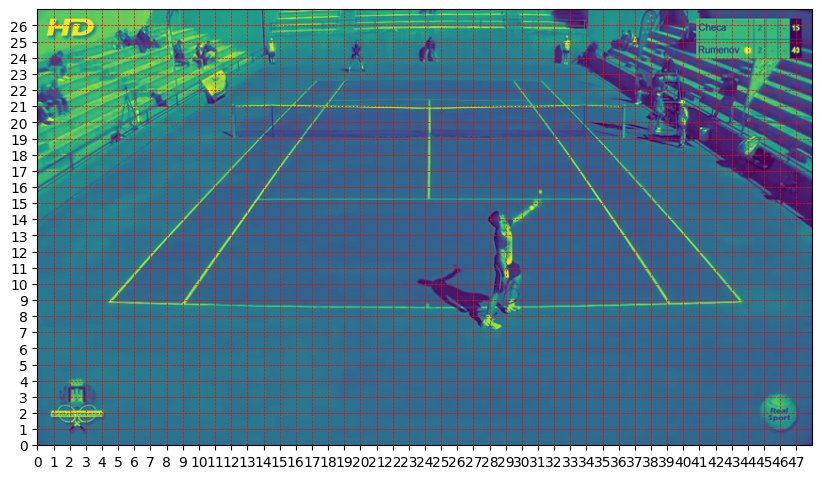

In [19]:
with h5py.File('./compiled_dataset/000.hdf5', 'r') as file:
    idx = 0 # Current instance index

    grid = file['labels'][2][0].transpose(2, 0, 1)[0]
    print(file['instances'][0].shape)
    print(file['labels'][0].shape)

    max_idx_flat = np.argmax(grid.reshape(-1))
    i, j = np.unravel_index(max_idx_flat, grid.shape)

    print(f"Max value {grid[i, j]} at position (i={i}, j={j})")
    
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_xticks(range(48))
    ax.set_yticks(range(27))

    ax.grid(True, color='red', linestyle='--', linewidth=0.5)

    ax.imshow(file['instances'][2][0], extent=[0, 48, 0, 27])

In [20]:
import os
import h5py

total_instances = 0

for path in os.listdir('compiled_dataset'):
    if (not path.endswith('.hdf5')): continue
    
    with h5py.File(os.path.join('compiled_dataset', path), 'r') as file:
        instances = file['instances'].shape
        total_instances += instances[0]

print(f"Total instances: {total_instances}")

Total instances: 3100


In [26]:
from torch.utils.data import DataLoader
from tracknet.dataset import TrackNet

dataset = TrackNet('compiled_dataset')
loader = DataLoader(dataset, batch_size=1)

for i, data in enumerate(loader):
    print(f"{i}")
    if (i == 3): break

0
1
2
3
